In [1]:
from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from patsy import dmatrix
import sys
import os
from pandas import read_csv
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import my_logit, scalling

In [2]:
import numpy as np
from pandas import DataFrame, MultiIndex, concat, merge
from math import sqrt
from scipy.stats import t, pearsonr, spearmanr
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro, normaltest, ks_2samp, bartlett, fligner, levene, chi2_contingency
from statsmodels.formula.api import ols
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from pca import pca
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score


In [3]:
data = pd.read_excel('https://data.hossam.kr/E05/indian_diabetes.xlsx')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


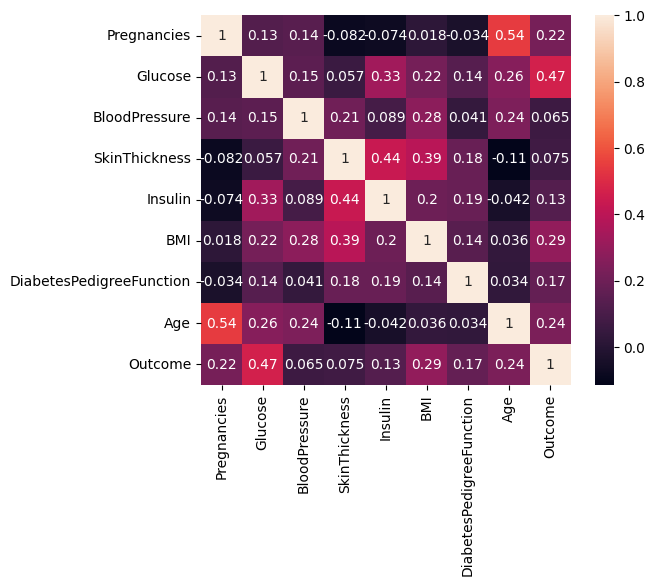

In [7]:
sb.heatmap(data=data.corr(), square=True, annot=True, cbar=True)
plt.show()

In [8]:
y_train = data['Outcome']
y_train

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
x_train = data.drop('Outcome', axis=1)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


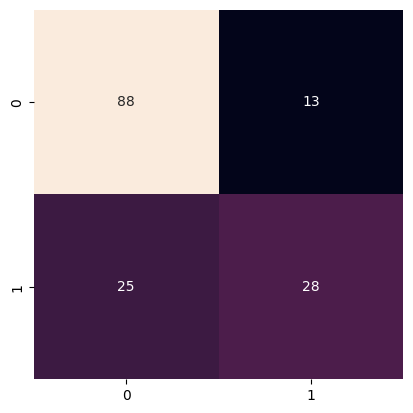

In [10]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred)) 
print("Recall:%.4f" % recall_score(y_val, y_val_pred)) 
print("F1:%.4f" % f1_score(y_val, y_val_pred)) 
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred)) 

Accuracy:0.7532
Precision:0.6829
Recall:0.5283
F1:0.5957
AUC:0.6998


In [12]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
train = pd.read_excel('https://data.hossam.kr/E05/titanic.xlsx')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
train1 = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


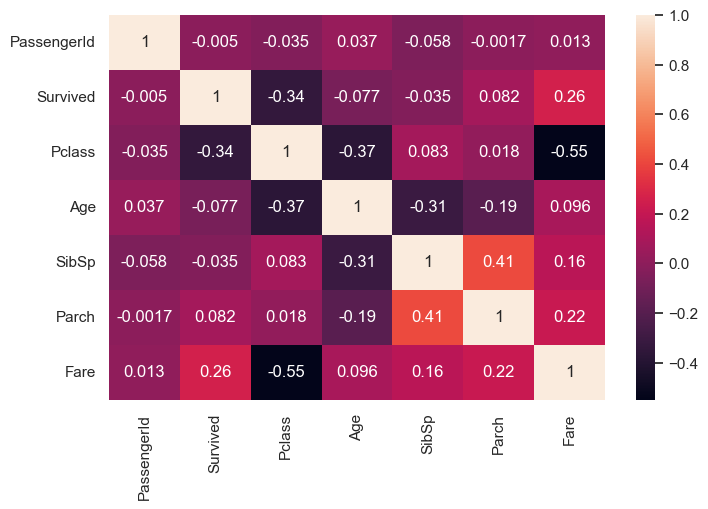

In [17]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

In [18]:
# 결측값 대체
data_num = train.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
data_num['Age'] = data_num['Age'].fillna(data_num['Age'].mean())
data_num['Fare'] = data_num['Fare'].fillna(data_num['Fare'].mode()[0])

In [19]:
x_train = train1.drop(['Survived'], axis=1)
y_train = train['Survived']
print(x_train.shape, y_train.shape)
print(x_train.head(2))

(891, 6) (891,)
   PassengerId  Pclass   Age  SibSp  Parch     Fare
0            1       3  22.0      1      0   7.2500
1            2       1  38.0      1      0  71.2833


In [20]:
x_train.isnull().sum()
x_train['Age'] = x_train['Age'].fillna(x_train['Age'].mean())

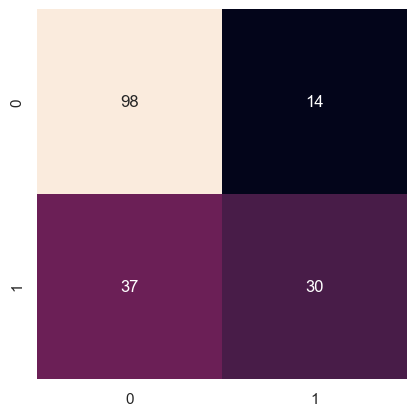

In [21]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, random_state=20)

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_tr, y_tr)
y_val_pred = lr_model.predict(x_val)

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, cbar=False, square=True)
plt.show()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
print("Accuracy:%.4f" % accuracy_score(y_val, y_val_pred))
print("Precision:%.4f" % precision_score(y_val, y_val_pred)) 
print("Recall:%.4f" % recall_score(y_val, y_val_pred)) 
print("F1:%.4f" % f1_score(y_val, y_val_pred)) 
print("AUC:%.4f" % roc_auc_score(y_val, y_val_pred)) 

Accuracy:0.7151
Precision:0.6818
Recall:0.4478
F1:0.5405
AUC:0.6614


In [23]:
from pandas import read_excel, DataFrame
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import sys

In [24]:
# train.columns
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [25]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [26]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train1['Age'] = train1['Age'].fillna(29)

In [28]:
model = logit('Survived~PassengerId+Pclass+Age+SibSp+Parch+Fare', data=train1)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.579730
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.1294
Time:                        11:09:58   Log-Likelihood:                -516.54
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.356e-30
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7427      0.458      5.994      0.000       1.846       3.640
PassengerId    -0.0002    

In [29]:
fit.prsquared

0.12941908677500402

In [30]:
train1['예측값'] = fit.predict(train1.drop('Survived', axis=1))
train1['예측결과'] = train1['예측값'] > 0.5
train1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,예측값,예측결과
0,1,0,3,22.0,1,0,7.2500,0.245057,False
1,2,1,1,38.0,1,0,71.2833,0.606912,True
2,3,1,3,26.0,0,0,7.9250,0.262337,False
3,4,1,1,35.0,1,0,53.1000,0.614298,True
4,5,0,3,35.0,0,0,8.0500,0.201321,False
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0.436010,False
887,888,1,1,19.0,0,0,30.0000,0.743787,True
888,889,0,3,29.0,1,2,23.4500,0.264487,False
889,890,1,1,26.0,0,0,30.0000,0.689442,True


In [31]:
cm = confusion_matrix(train1['Survived'], train1['예측결과'])
tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

cmdf = DataFrame(cm, index=['True', 'False'], columns=['Positive', 'Negative'])
cmdf

471 78 188 154


,Positive,Negative
True,471,78
False,188,154


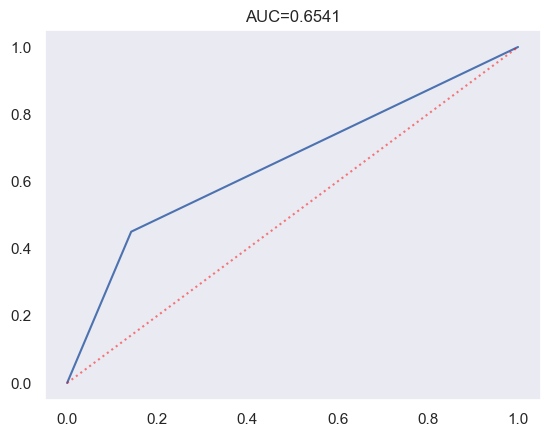

In [32]:
ras = roc_auc_score(train1['Survived'], train1['예측결과'])
# 위양성율, 재현율, 임계값(사용한함)
fpr, tpr, thresholdes = roc_curve(train1['Survived'], train1['예측결과'])

plt.figure()
sb.lineplot(x=fpr, y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title('AUC={:.4f}'.format(ras))
plt.grid()
plt.show()
plt.close()

In [33]:
# 정확도
acc = accuracy_score(train1['Survived'], train1['예측결과'])
# 정밀도
pre = precision_score(train1['Survived'], train1['예측결과'])
# 재현율
recall = recall_score(train1['Survived'], train1['예측결과'])
# F1 score
f1 = f1_score(train1['Survived'], train1['예측결과'])
# 위양성율
fallout = fp / (fp + tn)
# 특이성
spe = 1- fallout
result_df = DataFrame({'설명력(Pseudo-Rsqe)': [fit.prsquared], '정확도(Accuracy)':[acc], '정밀도(Precision)':[pre], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe], 'RAS': [ras], 'f1_score':[f1]})
result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.129419,0.701459,0.663793,0.450292,0.142077,0.857923,0.654108,0.536585


In [34]:
coef = fit.params
coef

Intercept      2.742722
PassengerId   -0.000167
Pclass        -0.939128
Age           -0.038271
SibSp         -0.241617
Parch          0.222140
Fare           0.004588
dtype: float64

In [35]:
odds_rate = np.exp(coef)
odds_rate

Intercept      15.529200
PassengerId     0.999833
Pclass          0.390969
Age             0.962452
SibSp           0.785357
Parch           1.248746
Fare            1.004598
dtype: float64

In [36]:
myinput = input("PassengerId, Pclass, Age, SibSp,Parch,Fare을 콤마(,)로 구분하여 입력하세요.\n예: 1,3,28,1,0,70")

if not myinput:
    myinput = "1,3,28,1,0,70"

myinput = myinput.split(',')
mydata = {'PassengerId': int(myinput[0].strip()), 'Pclass': float(myinput[1].strip()), 'Age': int(myinput[2].strip()),
          'SibSp': int(myinput[3].strip()), 'Parch': int(myinput[4].strip()),
          'Fare': int(myinput[5].strip()),
          }
myresult = fit.predict(mydata)
myresult

0    0.544479
dtype: float64

In [37]:
"당신의 생존 확률은 {0:0.2f}% 입니다.".format(myresult[0]*100)

'당신의 생존 확률은 54.45% 입니다.'